# Introduction to Regression with Neural Networks in TensorFlow

A regression problem can be used for predicting a numerical variable based on some other combination of variables... predicitng a number.

In [16]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Create data to view and fit

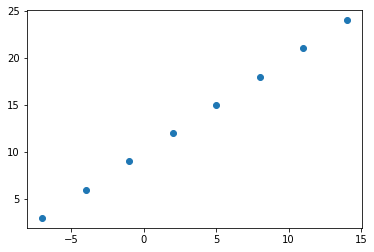

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [18]:
# Relationship to make the neural network learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [19]:
# Create a demo tensor for our housing price prediction
house_info = tf.constant(["bedroon", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroon', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [20]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [21]:
X[0].ndim, y[0].ndim

(0, 0)

In [22]:
X[0], y[0]

(-7.0, 3.0)

They are scalars thus they have dimension of 0

In [23]:
# Turn NumPy arrats into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
# Check shape and dimensions 
print("Input Shape:", X[0].shape)
print("Ouput Shape:", y[0].shape)
print("X dimensions:", X[0].ndim)
print("y dimensions:", y[0].ndim)

Input Shape: ()
Ouput Shape: ()
X dimensions: 0
y dimensions: 0


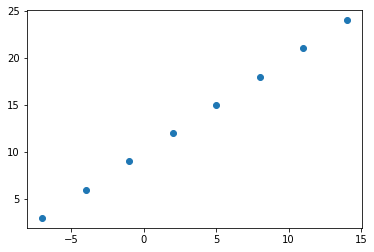

In [25]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preformance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (feature and labels)

In [26]:
# Set a randdom seed
tf. random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
             metrics=["mae"])

#3. Fit the model
X_expand = np.expand_dims(X, axis=1)
y_expand = np.expand_dims(y, axis=1)
print(X)
print(y)
model.fit(X_expand, y_expand, epochs=5)

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float64)
tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float64)
Epoch 1/5
1/1 [==============================] - 0s 206ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [27]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
print("NumPy Array")
print(X)
print(y)

# Turn NumPy arrays into tensors
X_tf = tf.constant(X)
y_tf = tf.constant(y)
print("NumPy Array to Tensor")
print(X)
print(y)

# Expand Array in 1st dimension
X_expand_1 = np.expand_dims(X, axis=1)
y_expand_1 = np.expand_dims(y, axis=1)
print(X_expand_1)
print(y_expand_1)

# Expand Array in 2nd dimension
X_expand_0 = np.expand_dims(X, axis=0)
y_expand_0 = np.expand_dims(y, axis=0)
print(X_expand_0)
print(y_expand_0)

NumPy Array
[-7. -4. -1.  2.  5.  8. 11. 14.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]
NumPy Array to Tensor
[-7. -4. -1.  2.  5.  8. 11. 14.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]
[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]]
[[ 3.]
 [ 6.]
 [ 9.]
 [12.]
 [15.]
 [18.]
 [21.]
 [24.]]
[[-7. -4. -1.  2.  5.  8. 11. 14.]]
[[ 3.  6.  9. 12. 15. 18. 21. 24.]]


In [28]:
# Make a prediction using the model
x = 17.0
y_pred = model.predict([x])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

1. **Creating a model** - add more layers, increase the number of hidden units within each of the layers, change the activation function of each layer.
2. **Compiling a model** - change the optimization function or the learning rate of the optimization function.
3. **Fitting a model** - Fit with more epochs to train longer or more data (give the model more examples to learn from)

In [29]:
# Rebuilding the model 
# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])
# 3. Fit the model
model.fit(X_expand,y_expand,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 214ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 2m

Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9038 - mae: 6.9038
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8981 - mae: 6.8981
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss

In [30]:
# Check data
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [31]:
# Check whether prediction has imrpoved
model.predict([17.0])

array([[29.739855]], dtype=float32)

### Common ways to improve a deep learning model
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function 
* Change the learning rate 
* Fitting on more data
* Fitting for longer

In [32]:
# Rebuilding the model 
# 1. Create the model (added dense layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
             metrics=["mae"])
# 3. Fit the model
model.fit(X_expand,y_expand,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 11.0647 - mae: 11.0647
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2525 - mae: 10.2525
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 9.3494 - mae: 9.3494
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 8.3538 - mae: 8.3538
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2645 - mae: 7.2645
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 6.6224 - mae: 6.6224
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.1023 - mae: 7.1023
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 7.6393 - mae: 7.6393
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.6539 - mae: 7.6539
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3079 - mae: 7.3079
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 6

1/1 [==============================] - 0s 4ms/step - loss: 0.2258 - mae: 0.2258
Epoch 90/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2432 - mae: 0.2432
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1068 - mae: 0.1068
Epoch 92/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3353 - mae: 0.3353
Epoch 93/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4320 - mae: 0.4320
Epoch 94/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3040 - mae: 0.3040
Epoch 95/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0791 - mae: 0.0791
Epoch 96/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1603 - mae: 0.1603
Epoch 97/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0620 - mae: 0.0620
Epoch 98/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2357 - mae: 0.2357
Epoch 99/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2743 - ma

In [33]:
model.predict([17.0])

array([[26.366266]], dtype=float32)

## Evaluating a model

Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate -> -> ->

**Visualize**
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [34]:
# Make a bigger dataset
X = tf.range(-100,100, 4)

# Make labels for the dataset
y = X+10

print(X,y)

tf.Tensor(
[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96], shape=(50,), dtype=int32) tf.Tensor(
[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106], shape=(50,), dtype=int32)


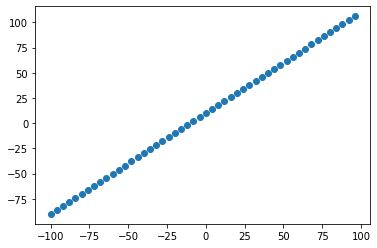

In [35]:
plt.scatter(X,y)

### The 3 sets

In [36]:
# Check length of how many samples there are
len(X)

50

In [37]:
# Split the data into testing and training sets 
X_train = X[:40] # The First 40 are training samples (80% of the data) 
X_test = X[40:] # The last 10 are testing samples (20% of the data)
y_train = y[:40]
y_test = y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data again

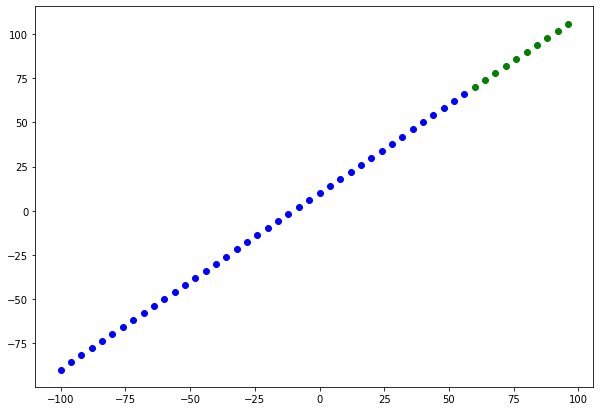

In [38]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training Data")
# Plot the testing data in green
plt.scatter(X_test,y_test, c="g", label="Testing Data")

In [39]:
# Building a meural net for out data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )
# 3. Fit the model
#model.fit(X_train,y_train, epochs=100)

## Visualizing the model

In [40]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [41]:
# Create a model which builds automatically by definind the input_shape
tf.random.set_seed(42)

# 1, Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Test_model")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [42]:
model.summary()

Model: "Test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* Total parameters - total number of parameters in the model. The number of patters it will try and learn
* Trainable parameters - the parameters (patterns) the model can update as it trains 
* Non-trainable parameters - these parameters aren't updated furing training (this is typical when you bring in already learned patters or paremeters from other models during **transfer learning**)

In [43]:
 # Fit the model to the training data
model.fit(X_train, y_train, epochs=100,)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 2ms/st

2/2 [==============================] - 0s 2ms/step - loss: 24.3047 - mae: 24.3047
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 18.9693 - mae: 18.9693
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1749 - mae: 7.1749
Epoch 90/100
2/2 [==============================] - 0s 1000us/step - loss: 18.2784 - mae: 18.2784
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 13.3343 - mae: 13.3343
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 8.7404 - mae: 8.7404
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 14.1947 - mae: 14.1947
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 17.1955 - mae: 17.1955
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 16.7777 - mae: 16.7777
Epoch 96/100
2/2 [==============================] - 0s 1000us/step - loss: 11.1365 - mae: 11.1365
Epoch 97/100
2/2 [==============================] - 0s 3ms/st

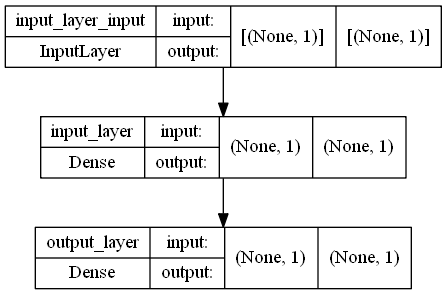

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of y_test or y_true versues y_pred (ground turth versus your model)

In [45]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 69.467125],
       [ 73.9856  ],
       [ 78.50408 ],
       [ 83.02256 ],
       [ 87.54104 ],
       [ 92.05952 ],
       [ 96.577995],
       [101.09647 ],
       [105.61495 ],
       [110.13344 ]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [47]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data/test data and compares predictions to ground truth labels
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    #Plot model predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

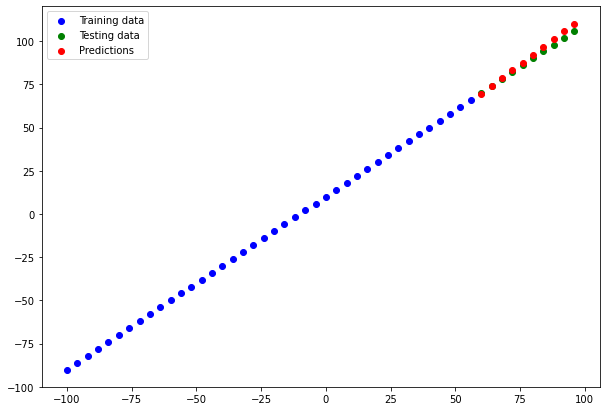

In [48]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem different evaluation metrics will be needed to evaluate a model's performance

With regression:
* MAE - mean absolute error, "On average, how wrong is each of my models predictions"
* MSE - mean square error, the square of the average errors

In [43]:
# Evaluate the model on the test dataset
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 1.9097 - mae: 1.9097


[1.9097328186035156, 1.9097328186035156]

In [48]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.532875, 14.811518, 12.198367, 10.595488, 10.      , 10.411903,
       11.831198, 14.257884, 17.691961, 22.133438], dtype=float32)>

In [49]:
y_test,y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([[ 69.467125],
        [ 73.9856  ],
        [ 78.50408 ],
        [ 83.02256 ],
        [ 87.54104 ],
        [ 92.05952 ],
        [ 96.577995],
        [101.09647 ],
        [105.61495 ],
        [110.13344 ]], dtype=float32))

**notice they are of differing dimensionality**

In [51]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.467125,  73.9856  ,  78.50408 ,  83.02256 ,  87.54104 ,
        92.05952 ,  96.577995, 101.09647 , 105.61495 , 110.13344 ],
      dtype=float32)>

In [52]:
# Calculate the mean absolute error 
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9097328>

In [53]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.45877>

In [65]:
# Make functions to reuse MAE and MSE

def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred)).numpy()
def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred)).numpy()

### Running experiments to improve our model

1. Get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make the model larger (using a complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model 1 layer trained or 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs 
3. `model_3` - 2 layers, trained for 500 epochs

## Build model 1

In [66]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100,)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 997us/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 2ms/step -

2/2 [==============================] - 0s 2ms/step - loss: 12.0209 - mae: 12.0209
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 2ms/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 2ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 999us/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 2ms/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3558 - mae: 9.3558
Epoch 97/100
2/2 [==============================] - 0s 2ms/step - loss:

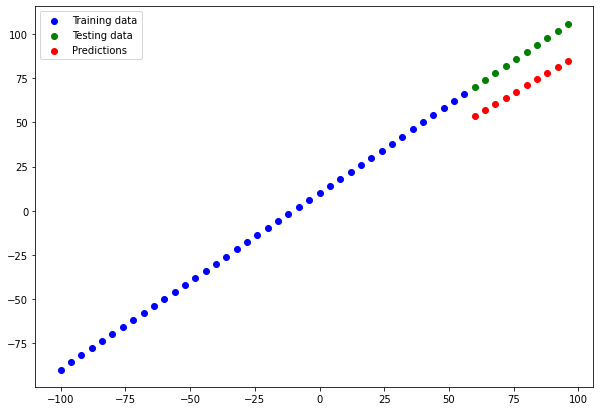

In [67]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [68]:
# Calculate model_1 evaluation metrics 
mae_1 = mae(y_test,y_preds_1)
mse_1 = mse(y_test,y_preds_1)
mae_1,mse_1

(18.745327, 353.57336)

## Build model 2

* 2 Dense layers, trained for 100 epochs

In [69]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1], name="input"),
    tf.keras.layers.Dense(1,input_shape=[1], name="output")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mse"])
# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 27.4055 - mse: 1106.8033
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 40.4763 - mse: 2586.0088
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [==========================

2/2 [==============================] - 0s 2ms/step - loss: 15.2862 - mse: 315.3605
Epoch 87/100
2/2 [==============================] - 0s 2ms/step - loss: 19.1086 - mse: 521.2535
Epoch 88/100
2/2 [==============================] - 0s 2ms/step - loss: 29.8228 - mse: 1287.1902
Epoch 89/100
2/2 [==============================] - 0s 997us/step - loss: 10.1742 - mse: 124.1342
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 21.5240 - mse: 663.8608
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 10.5716 - mse: 161.7467
Epoch 92/100
2/2 [==============================] - 0s 2ms/step - loss: 18.3977 - mse: 464.1323
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 7.4138 - mse: 81.9820
Epoch 94/100
2/2 [==============================] - 0s 2ms/step - loss: 17.7380 - mse: 445.7377
Epoch 95/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1144 - mse: 164.0820
Epoch 96/100
2/2 [==============================] - 

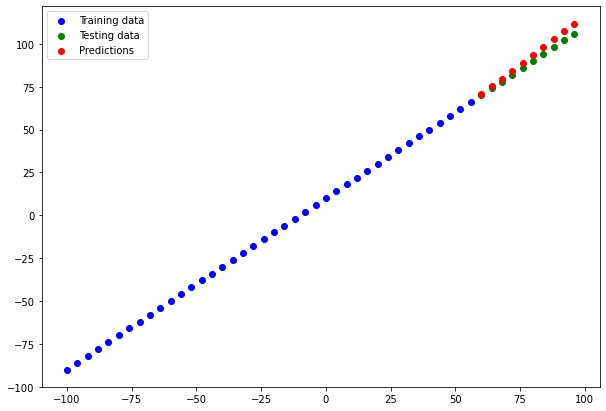

In [70]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [71]:
# Calculate model_2 evaluation metrics 
mae_2 = mae(y_test,y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2,mse_2

(3.19694, 13.070127)

## Build model 3

* 2 Dense layers, trained for 500 epochs

In [72]:
# Set seed
tf.random.set_seed(42)

#1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input"),
    tf.keras.layers.Dense(1)
    ])
#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
#3. Fit the model 
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 1000us/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 997us/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 2ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/500
2/2 [==============================] - 0s 2ms/step - loss: 29.8228 - mae: 29.8228
Epoch 89/500
2/2 [==============================] - 0s 2ms/step - loss: 10.1742 - mae: 10.1742
Epoch 90/500
2/2 [==============================] - 0s 2ms/step - loss: 21.5240 - mae: 21.5240
Epoch 91/500
2/2 [==============================] - 0s 1000us/step - loss: 10.5716 - mae: 10.5716
Epoch 92/500
2/2 [==============================] - 0s 2ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/500
2/2 [==============================] - 0s 2ms/step - loss: 7.4138 - mae: 7.4138
Epoch 94/500
2/2 [==============================] - 0s 3ms/step - loss: 17.7380 - mae: 17.7380
Epoch 95/500
2/2 [==============================] - 0s 2ms/step - loss: 11.1144 - mae: 11.1144
Epoch 96/500
2/2 [==============================] - 0s 2ms/step - loss: 19.4346 - mae: 19.4346
Epoch 97/500
2/2 [==============================] - 0s 2ms/ste

Epoch 173/500
2/2 [==============================] - 0s 5ms/step - loss: 16.5279 - mae: 16.5279
Epoch 174/500
2/2 [==============================] - 0s 2ms/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 998us/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 2ms/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 2ms/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 2ms/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [==============================] - 0s 2ms/step - loss: 10.5995 - mae: 10.5995
Epoch 180/500
2/2 [==============================] - 0s 1ms/step - loss: 7.8992 - mae: 7.8992
Epoch 181/500
2/2 [==============================] - 0s 2ms/step - loss: 17.4015 - mae: 17.4015
Epoch 182/500
2/2 [==============================] - 0s 1ms/step - loss: 11.0089 - mae: 11.0089
Epoch 183/500
2/2 [=========================

2/2 [==============================] - 0s 2ms/step - loss: 14.4883 - mae: 14.4883
Epoch 259/500
2/2 [==============================] - 0s 999us/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 3ms/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 2ms/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - 0s 2ms/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [==============================] - 0s 2ms/step - loss: 13.7211 - mae: 13.7211
Epoch 264/500
2/2 [==============================] - 0s 2ms/step - loss: 21.0154 - mae: 21.0154
Epoch 265/500
2/2 [==============================] - 0s 1ms/step - loss: 19.3730 - mae: 19.3730
Epoch 266/500
2/2 [==============================] - 0s 2ms/step - loss: 11.4735 - mae: 11.4735
Epoch 267/500
2/2 [==============================] - 0s 2ms/step - loss: 7.5302 - mae: 7.5302
Epoch 268/500
2/2 [==============================] - 0s 2m

2/2 [==============================] - 0s 2ms/step - loss: 9.3943 - mae: 9.3943
Epoch 344/500
2/2 [==============================] - 0s 2ms/step - loss: 5.6071 - mae: 5.6071
Epoch 345/500
2/2 [==============================] - 0s 2ms/step - loss: 37.4876 - mae: 37.4876
Epoch 346/500
2/2 [==============================] - 0s 998us/step - loss: 16.8830 - mae: 16.8830
Epoch 347/500
2/2 [==============================] - 0s 2ms/step - loss: 12.8748 - mae: 12.8748
Epoch 348/500
2/2 [==============================] - 0s 2ms/step - loss: 8.1960 - mae: 8.1960
Epoch 349/500
2/2 [==============================] - 0s 2ms/step - loss: 13.5568 - mae: 13.5568
Epoch 350/500
2/2 [==============================] - 0s 2ms/step - loss: 15.4354 - mae: 15.4354
Epoch 351/500
2/2 [==============================] - 0s 2ms/step - loss: 32.9626 - mae: 32.9626
Epoch 352/500
2/2 [==============================] - 0s 2ms/step - loss: 14.2040 - mae: 14.2040
Epoch 353/500
2/2 [==============================] - 0s 3m

2/2 [==============================] - 0s 2ms/step - loss: 12.9962 - mae: 12.9962
Epoch 429/500
2/2 [==============================] - 0s 3ms/step - loss: 10.7869 - mae: 10.7869
Epoch 430/500
2/2 [==============================] - 0s 1ms/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [==============================] - 0s 998us/step - loss: 10.6153 - mae: 10.6153
Epoch 432/500
2/2 [==============================] - 0s 2ms/step - loss: 11.4582 - mae: 11.4582
Epoch 433/500
2/2 [==============================] - 0s 2ms/step - loss: 11.3851 - mae: 11.3851
Epoch 434/500
2/2 [==============================] - 0s 1000us/step - loss: 30.3986 - mae: 30.3986
Epoch 435/500
2/2 [==============================] - 0s 998us/step - loss: 10.5052 - mae: 10.5052
Epoch 436/500
2/2 [==============================] - 0s 2ms/step - loss: 28.8810 - mae: 28.8810
Epoch 437/500
2/2 [==============================] - 0s 2ms/step - loss: 8.5916 - mae: 8.5916
Epoch 438/500
2/2 [==============================

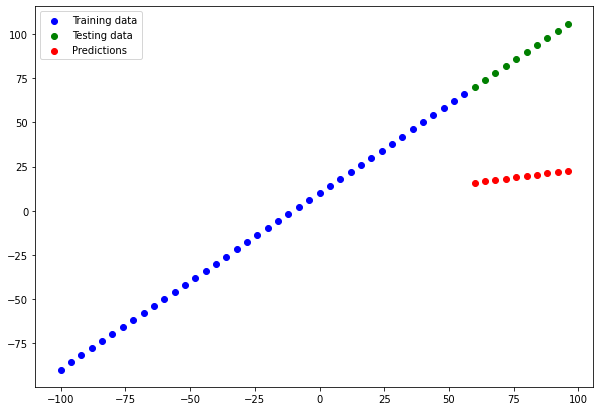

In [73]:
# Make the plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [74]:
# Calculate the model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3,mse_3

(68.713615, 4808.0273)

## Comparing the results of our experiments

In [75]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
              ["model_2", mae_2, mse_2],
              ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


`Model_2` performed the best

In [ ]:
model_2.summary()

## Tracking experiments
* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights and Biases - a tool for tracking machine learning experiments (plugs straight into TensorFlow)

## Saving models

Saving our models allows us to use them outside of where they were trained such as in a web application or a mobile app

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [77]:
# Save model using the SavedModel format 
model_2.save("model_2_SaveModel_format")

INFO:tensorflow:Assets written to: model_2_SaveModel_format\assets


In [78]:
# Save model using the HDF5 format
model_2.save("model_2_SaveModel_format.h5")

## Loading in a saved model

In [80]:
# Load in a SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("model_2_SaveModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
## Doublecheck saved file
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [86]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

True

In [89]:
# Load in a model using the HDF5 format
loaded_h5_model = tf.keras.models.load_model("model_2_SaveModel_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Check to see if loaded ,h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
h5_preds = loaded_h5_model.predict(X_test)
model_2_preds == h5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A Larger Example

In [92]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# Read in the insurance dataset
insurance = pd.read_csv("https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [95]:
# One hot encode DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [179]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges',axis=1)
y = insurance_one_hot["charges"]
X,y
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build insurance model 1
tf.random.set_seed(42)
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_1.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])
history_1 = insurance_model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 848us/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 758us/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 818us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 788us/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 818us/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 788us/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 788us/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 788us/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 788us/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 787us/step - loss: 7493.1

34/34 [==============================] - 0s 818us/step - loss: 7279.3784 - mae: 7279.3784
Epoch 81/100
34/34 [==============================] - 0s 788us/step - loss: 7273.8477 - mae: 7273.8477
Epoch 82/100
34/34 [==============================] - 0s 788us/step - loss: 7176.5210 - mae: 7176.5210
Epoch 83/100
34/34 [==============================] - 0s 788us/step - loss: 7425.6294 - mae: 7425.6294
Epoch 84/100
34/34 [==============================] - 0s 818us/step - loss: 7403.1289 - mae: 7403.1289
Epoch 85/100
34/34 [==============================] - 0s 848us/step - loss: 7356.0088 - mae: 7356.0088
Epoch 86/100
34/34 [==============================] - 0s 818us/step - loss: 7484.7271 - mae: 7484.7271
Epoch 87/100
34/34 [==============================] - 0s 818us/step - loss: 7217.6074 - mae: 7217.6074
Epoch 88/100
34/34 [==============================] - 0s 818us/step - loss: 7261.0000 - mae: 7261.0000
Epoch 89/100
34/34 [==============================] - 0s 818us/step - loss: 7134.1558 

In [144]:
# Check the results of insurance Data on test Data
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 875us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [145]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

The model isn't performing well and needs to be improved
1. Add more layers and swwitch to adam optimizer
2. Train for a longer time

In [178]:
# Build insurance model 2
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["mae"])
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 909us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 909us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 909us/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/100
34/34 [==============================] - 0s 909us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 970us/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/100
34/34 [==============================] - 0s 910us/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/100
34/34 [==============================] - 0s 939us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 970us/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 939us/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 910us/step - lo

34/34 [==============================] - 0s 939us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/100
34/34 [==============================] - 0s 909us/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/100
34/34 [==============================] - 0s 879us/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/100
34/34 [==============================] - 0s 939us/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/100
34/34 [==============================] - 0s 909us/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/100
34/34 [==============================] - 0s 939us/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/100
34/34 [==============================] - 0s 909us/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/100
34/34 [==============================] - 0s 910us/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/100
34/34 [==============================] - 0s 879us/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/100
34/34 [==============================] - 0s 939us/step - loss: 5600.6650 

In [152]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1000us/step - loss: 4924.5093 - mae: 4924.5093


[4924.50927734375, 4924.50927734375]

In [177]:
# Build insurance model 3
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["mae"])
history_3 = insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 940us/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/500
34/34 [==============================] - 0s 970us/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/500
34/34 [==============================] - 0s 939us/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/500
34/34 [==============================] - 0s 970us/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/500
34/34 [==============================] - 0s 970us/step - loss: 9457.7227 - mae: 9457.7227
Epoch 7/500
34/34 [==============================] - 0s 939us/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/500
34/34 [==============================] - 0s 939us/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/500
34/34 [==============================] - 0s 939us/step - loss: 

34/34 [==============================] - 0s 970us/step - loss: 5887.9990 - mae: 5887.9990
Epoch 81/500
34/34 [==============================] - 0s 909us/step - loss: 5861.6987 - mae: 5861.6987
Epoch 82/500
34/34 [==============================] - 0s 941us/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/500
34/34 [==============================] - 0s 909us/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/500
34/34 [==============================] - 0s 937us/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/500
34/34 [==============================] - 0s 1ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/500
34/34 [==============================] - 0s 909us/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/500
34/34 [==============================] - 0s 911us/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/500
34/34 [==============================] - 0s 960us/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/500
34/34 [==============================] - 0s 939us/step - loss: 5600.6650 - 

34/34 [==============================] - 0s 939us/step - loss: 3728.5618 - mae: 3728.5618
Epoch 160/500
34/34 [==============================] - 0s 970us/step - loss: 3733.9949 - mae: 3733.9949
Epoch 161/500
34/34 [==============================] - 0s 885us/step - loss: 3728.1074 - mae: 3728.1074
Epoch 162/500
34/34 [==============================] - 0s 909us/step - loss: 3725.3667 - mae: 3725.3667
Epoch 163/500
34/34 [==============================] - 0s 970us/step - loss: 3722.9504 - mae: 3722.9504
Epoch 164/500
34/34 [==============================] - 0s 1000us/step - loss: 3727.0610 - mae: 3727.0610
Epoch 165/500
34/34 [==============================] - 0s 909us/step - loss: 3717.6614 - mae: 3717.6614
Epoch 166/500
34/34 [==============================] - 0s 970us/step - loss: 3720.3701 - mae: 3720.3701
Epoch 167/500
34/34 [==============================] - 0s 939us/step - loss: 3720.2913 - mae: 3720.2913
Epoch 168/500
34/34 [==============================] - 0s 970us/step - loss: 

34/34 [==============================] - 0s 1000us/step - loss: 3597.5608 - mae: 3597.5608
Epoch 239/500
34/34 [==============================] - 0s 1000us/step - loss: 3608.1814 - mae: 3608.1814
Epoch 240/500
34/34 [==============================] - 0s 1000us/step - loss: 3604.1812 - mae: 3604.1812
Epoch 241/500
34/34 [==============================] - 0s 970us/step - loss: 3598.7771 - mae: 3598.7771
Epoch 242/500
34/34 [==============================] - 0s 939us/step - loss: 3596.0938 - mae: 3596.0938
Epoch 243/500
34/34 [==============================] - 0s 1ms/step - loss: 3592.0952 - mae: 3592.0952
Epoch 244/500
34/34 [==============================] - 0s 909us/step - loss: 3606.4673 - mae: 3606.4673
Epoch 245/500
34/34 [==============================] - 0s 939us/step - loss: 3591.5386 - mae: 3591.5386
Epoch 246/500
34/34 [==============================] - 0s 970us/step - loss: 3586.4480 - mae: 3586.4480
Epoch 247/500
34/34 [==============================] - 0s 939us/step - loss: 

34/34 [==============================] - 0s 1ms/step - loss: 3484.4412 - mae: 3484.4412
Epoch 318/500
34/34 [==============================] - 0s 970us/step - loss: 3486.9937 - mae: 3486.9937
Epoch 319/500
34/34 [==============================] - 0s 1ms/step - loss: 3483.8428 - mae: 3483.8428
Epoch 320/500
34/34 [==============================] - 0s 970us/step - loss: 3488.1843 - mae: 3488.1843
Epoch 321/500
34/34 [==============================] - 0s 1000us/step - loss: 3495.4382 - mae: 3495.4382
Epoch 322/500
34/34 [==============================] - 0s 1ms/step - loss: 3495.4736 - mae: 3495.4736
Epoch 323/500
34/34 [==============================] - 0s 1ms/step - loss: 3482.3899 - mae: 3482.3899
Epoch 324/500
34/34 [==============================] - 0s 1ms/step - loss: 3484.4968 - mae: 3484.4968
Epoch 325/500
34/34 [==============================] - 0s 1000us/step - loss: 3480.6138 - mae: 3480.6138
Epoch 326/500
34/34 [==============================] - 0s 1ms/step - loss: 3483.1086 -

34/34 [==============================] - 0s 910us/step - loss: 3483.2463 - mae: 3483.2463
Epoch 397/500
34/34 [==============================] - 0s 909us/step - loss: 3480.2021 - mae: 3480.2021
Epoch 398/500
34/34 [==============================] - 0s 909us/step - loss: 3479.0793 - mae: 3479.0793
Epoch 399/500
34/34 [==============================] - 0s 913us/step - loss: 3484.3813 - mae: 3484.3813
Epoch 400/500
34/34 [==============================] - 0s 939us/step - loss: 3476.1326 - mae: 3476.1326
Epoch 401/500
34/34 [==============================] - 0s 910us/step - loss: 3480.2847 - mae: 3480.2847
Epoch 402/500
34/34 [==============================] - 0s 910us/step - loss: 3482.2583 - mae: 3482.2583
Epoch 403/500
34/34 [==============================] - 0s 970us/step - loss: 3483.3513 - mae: 3483.3513
Epoch 404/500
34/34 [==============================] - 0s 939us/step - loss: 3481.0186 - mae: 3481.0186
Epoch 405/500
34/34 [==============================] - 0s 939us/step - loss: 3

34/34 [==============================] - 0s 939us/step - loss: 3480.7671 - mae: 3480.7671
Epoch 475/500
34/34 [==============================] - 0s 939us/step - loss: 3497.3318 - mae: 3497.3318
Epoch 476/500
34/34 [==============================] - 0s 909us/step - loss: 3490.6284 - mae: 3490.6284
Epoch 477/500
34/34 [==============================] - 0s 909us/step - loss: 3492.6951 - mae: 3492.6951
Epoch 478/500
34/34 [==============================] - 0s 909us/step - loss: 3476.3896 - mae: 3476.3896
Epoch 479/500
34/34 [==============================] - 0s 909us/step - loss: 3483.0134 - mae: 3483.0134
Epoch 480/500
34/34 [==============================] - 0s 939us/step - loss: 3484.4111 - mae: 3484.4111
Epoch 481/500
34/34 [==============================] - 0s 976us/step - loss: 3475.3701 - mae: 3475.3701
Epoch 482/500
34/34 [==============================] - 0s 910us/step - loss: 3485.6179 - mae: 3485.6179
Epoch 483/500
34/34 [==============================] - 0s 939us/step - loss: 3

In [160]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3169.1838 - mae: 3169.1838


[3169.183837890625, 3169.183837890625]

In [174]:
# Build insurance model 4
tf.random.set_seed(42)
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_4.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=["mae"])
history_4 = insurance_model_4.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 970us/step - loss: 13313.8076 - mae: 13313.8076
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13227.2344 - mae: 13227.2344
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 13035.3926 - mae: 13035.3926
Epoch 4/500
34/34 [==============================] - 0s 942us/step - loss: 12651.0479 - mae: 12651.0479
Epoch 5/500
34/34 [==============================] - 0s 981us/step - loss: 11978.7607 - mae: 11978.7607
Epoch 6/500
34/34 [==============================] - 0s 974us/step - loss: 10952.0078 - mae: 10952.0078
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 9709.3428 - mae: 9709.3428
Epoch 8/500
34/34 [==============================] - 0s 970us/step - loss: 8515.5801 - mae: 8515.5801
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 7727.5698 - mae: 7727.5698
Epoch 10/500
34/34 [==============================] - 0s 909us/step - loss: 74

Epoch 81/500
34/34 [==============================] - 0s 1000us/step - loss: 6052.6680 - mae: 6052.6680
Epoch 82/500
34/34 [==============================] - 0s 909us/step - loss: 6034.8794 - mae: 6034.8794
Epoch 83/500
34/34 [==============================] - 0s 959us/step - loss: 6013.9180 - mae: 6013.9180
Epoch 84/500
34/34 [==============================] - 0s 970us/step - loss: 5993.3057 - mae: 5993.3057
Epoch 85/500
34/34 [==============================] - 0s 967us/step - loss: 5977.3472 - mae: 5977.3472
Epoch 86/500
34/34 [==============================] - 0s 1ms/step - loss: 5953.8774 - mae: 5953.8774
Epoch 87/500
34/34 [==============================] - 0s 1ms/step - loss: 5932.9648 - mae: 5932.9648
Epoch 88/500
34/34 [==============================] - 0s 970us/step - loss: 5913.2578 - mae: 5913.2578
Epoch 89/500
34/34 [==============================] - 0s 1ms/step - loss: 5889.7261 - mae: 5889.7261
Epoch 90/500
34/34 [==============================] - 0s 1ms/step - loss: 5865

34/34 [==============================] - 0s 1ms/step - loss: 3554.5498 - mae: 3554.5498
Epoch 161/500
34/34 [==============================] - 0s 970us/step - loss: 3554.0076 - mae: 3554.0076
Epoch 162/500
34/34 [==============================] - 0s 910us/step - loss: 3547.5349 - mae: 3547.5349
Epoch 163/500
34/34 [==============================] - 0s 909us/step - loss: 3548.7397 - mae: 3548.7397
Epoch 164/500
34/34 [==============================] - 0s 939us/step - loss: 3549.1157 - mae: 3549.1157
Epoch 165/500
34/34 [==============================] - 0s 1ms/step - loss: 3535.1831 - mae: 3535.1831
Epoch 166/500
34/34 [==============================] - 0s 970us/step - loss: 3532.8044 - mae: 3532.8044
Epoch 167/500
34/34 [==============================] - 0s 970us/step - loss: 3529.4463 - mae: 3529.4463
Epoch 168/500
34/34 [==============================] - 0s 1000us/step - loss: 3521.4485 - mae: 3521.4485
Epoch 169/500
34/34 [==============================] - 0s 1ms/step - loss: 3518.0

34/34 [==============================] - 0s 970us/step - loss: 3259.6382 - mae: 3259.6382
Epoch 240/500
34/34 [==============================] - 0s 970us/step - loss: 3251.9827 - mae: 3251.9827
Epoch 241/500
34/34 [==============================] - 0s 939us/step - loss: 3245.9473 - mae: 3245.9473
Epoch 242/500
34/34 [==============================] - 0s 939us/step - loss: 3237.9839 - mae: 3237.9839
Epoch 243/500
34/34 [==============================] - 0s 939us/step - loss: 3233.0342 - mae: 3233.0342
Epoch 244/500
34/34 [==============================] - 0s 1ms/step - loss: 3228.6890 - mae: 3228.6890
Epoch 245/500
34/34 [==============================] - 0s 1000us/step - loss: 3225.3596 - mae: 3225.3596
Epoch 246/500
34/34 [==============================] - 0s 1ms/step - loss: 3220.5498 - mae: 3220.5498
Epoch 247/500
34/34 [==============================] - 0s 970us/step - loss: 3216.9077 - mae: 3216.9077
Epoch 248/500
34/34 [==============================] - 0s 970us/step - loss: 3211

34/34 [==============================] - 0s 939us/step - loss: 2907.8325 - mae: 2907.8325
Epoch 319/500
34/34 [==============================] - 0s 970us/step - loss: 2907.9290 - mae: 2907.9290
Epoch 320/500
34/34 [==============================] - 0s 1000us/step - loss: 2904.4009 - mae: 2904.4009
Epoch 321/500
34/34 [==============================] - 0s 939us/step - loss: 2903.8882 - mae: 2903.8882
Epoch 322/500
34/34 [==============================] - 0s 970us/step - loss: 2905.6729 - mae: 2905.6729
Epoch 323/500
34/34 [==============================] - 0s 970us/step - loss: 2901.3257 - mae: 2901.3257
Epoch 324/500
34/34 [==============================] - 0s 1000us/step - loss: 2900.5698 - mae: 2900.5698
Epoch 325/500
34/34 [==============================] - 0s 1000us/step - loss: 2895.4841 - mae: 2895.4841
Epoch 326/500
34/34 [==============================] - 0s 970us/step - loss: 2896.2432 - mae: 2896.2432
Epoch 327/500
34/34 [==============================] - 0s 983us/step - loss

34/34 [==============================] - 0s 956us/step - loss: 2777.5205 - mae: 2777.5205
Epoch 398/500
34/34 [==============================] - 0s 1ms/step - loss: 2767.7109 - mae: 2767.7109
Epoch 399/500
34/34 [==============================] - 0s 1ms/step - loss: 2773.1648 - mae: 2773.1648
Epoch 400/500
34/34 [==============================] - 0s 1ms/step - loss: 2771.6553 - mae: 2771.6553
Epoch 401/500
34/34 [==============================] - 0s 1ms/step - loss: 2765.2385 - mae: 2765.2385
Epoch 402/500
34/34 [==============================] - 0s 1ms/step - loss: 2767.0171 - mae: 2767.0171
Epoch 403/500
34/34 [==============================] - 0s 1000us/step - loss: 2763.0513 - mae: 2763.0513
Epoch 404/500
34/34 [==============================] - 0s 962us/step - loss: 2758.5796 - mae: 2758.5796
Epoch 405/500
34/34 [==============================] - 0s 1ms/step - loss: 2759.6379 - mae: 2759.6379
Epoch 406/500
34/34 [==============================] - 0s 970us/step - loss: 2761.0566 - 

34/34 [==============================] - 0s 940us/step - loss: 2643.3071 - mae: 2643.3071
Epoch 477/500
34/34 [==============================] - 0s 1000us/step - loss: 2644.2852 - mae: 2644.2852
Epoch 478/500
34/34 [==============================] - 0s 970us/step - loss: 2640.5125 - mae: 2640.5125
Epoch 479/500
34/34 [==============================] - 0s 1ms/step - loss: 2639.2297 - mae: 2639.2297
Epoch 480/500
34/34 [==============================] - 0s 1ms/step - loss: 2634.9294 - mae: 2634.9294
Epoch 481/500
34/34 [==============================] - 0s 1ms/step - loss: 2636.4673 - mae: 2636.4673
Epoch 482/500
34/34 [==============================] - 0s 1000us/step - loss: 2636.6636 - mae: 2636.6636
Epoch 483/500
34/34 [==============================] - 0s 1ms/step - loss: 2631.8691 - mae: 2631.8691
Epoch 484/500
34/34 [==============================] - 0s 1ms/step - loss: 2631.7178 - mae: 2631.7178
Epoch 485/500
34/34 [==============================] - 0s 1ms/step - loss: 2633.7131 -

In [171]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 875us/step - loss: 2394.7109 - mae: 2394.7109


[2394.7109375, 2394.7109375]

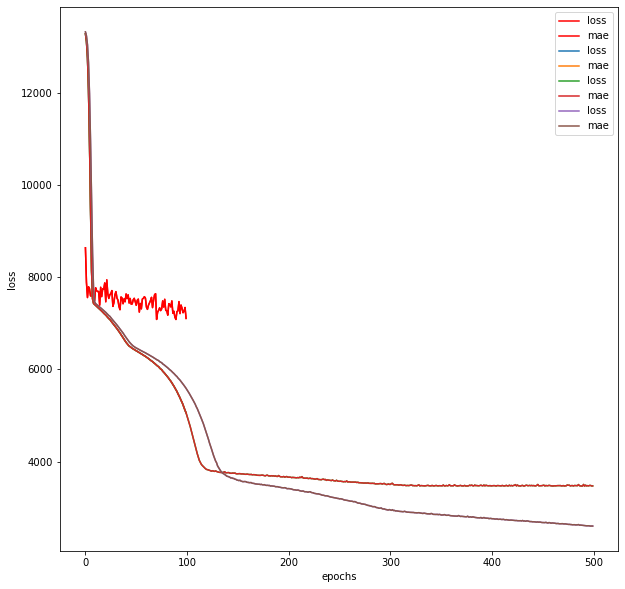

In [286]:
# Plot history (also known as a loss curve or a training curve)
# Grab dataframes
df1 = pd.DataFrame(history_1.history)
df2 = pd.DataFrame(history_2.history)
df3 = pd.DataFrame(history_3.history)
df4 = pd.DataFrame(history_4.history)

#Plot figure


ax = pd.DataFrame(history_1.history).plot(figsize=(10,10),color="red", label ='run1')
df2.plot(ax=ax,label="model 2")
df3.plot(ax=ax,label="model 3")
df4.plot(ax=ax,label="model_4")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
    # Plot training data in blue 
plt.scatter(train_data, train_labels, c="b", label="Training data")

In [250]:
df1

,loss,mae
0,8637.100586,8637.100586
1,7886.775879,7886.775879
2,7558.146973,7558.146973
3,7792.022949,7792.022949
4,7748.389160,7748.389160
...,...,...
95,7328.088379,7328.088379
96,7230.437988,7230.437988
97,7261.393555,7261.393555
98,7342.568359,7342.568359


In [188]:
history_1.history

{'loss': [8637.1005859375,
  7886.77587890625,
  7558.14697265625,
  7792.02294921875,
  7748.38916015625,
  7595.39453125,
  7589.98486328125,
  7698.55908203125,
  7496.77880859375,
  7493.17333984375,
  7769.7314453125,
  7706.9033203125,
  7687.72265625,
  7689.89990234375,
  7393.5322265625,
  7780.6982421875,
  7578.50927734375,
  7750.8349609375,
  7739.2138671875,
  7875.0634765625,
  7466.6767578125,
  7941.23095703125,
  7640.2724609375,
  7539.265625,
  7619.9658203125,
  7644.17041015625,
  7709.0361328125,
  7366.8662109375,
  7444.3134765625,
  7616.40869140625,
  7686.3857421875,
  7548.09814453125,
  7501.552734375,
  7363.41552734375,
  7295.44677734375,
  7569.88037109375,
  7548.2001953125,
  7424.39794921875,
  7529.77392578125,
  7467.32373046875,
  7635.92822265625,
  7536.83984375,
  7616.58447265625,
  7439.49365234375,
  7538.01513671875,
  7415.14599609375,
  7420.69384765625,
  7509.98388671875,
  7541.1123046875,
  7467.86328125,
  7389.35498046875,
  7499.7

## Preprocessing Data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

In [300]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance datafram
insurance = pd.read_csv("https://github.com/stedy/Machine-Learning-with-R-datasets/raw/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


we can prepare data with classes from Scikit-Learn

In [306]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [308]:
# What does the data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [309]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [310]:
# How has shape changed
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

<AxesSubplot:ylabel='Frequency'>

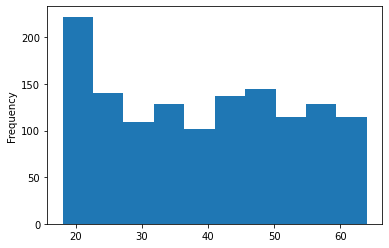

In [293]:
X["age"].plot(kind="hist")

In [324]:
# Build a neural network model to fit the normalized dataset
tf.random.set_seed(42)
normal_insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
normal_insurance_model.compile(loss=tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                              metrics=["mae"])
normal_insurance_model.fit(X_train_normal,y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13344.4160 - mae: 13344.4160
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13339.2773 - mae: 13339.2773
Epoch 3/500
34/34 [==============================] - 0s 994us/step - loss: 13325.4678 - mae: 13325.4678
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13294.5264 - mae: 13294.5264
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13238.1992 - mae: 13238.1992
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13148.0947 - mae: 13148.0947
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 13015.9180 - mae: 13015.9180
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 12833.1855 - mae: 12833.1855
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 12589.5771 - mae: 12589.5771
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 12273.

34/34 [==============================] - 0s 970us/step - loss: 3680.3999 - mae: 3680.3999
Epoch 82/500
34/34 [==============================] - 0s 1000us/step - loss: 3666.6128 - mae: 3666.6128
Epoch 83/500
34/34 [==============================] - 0s 1ms/step - loss: 3651.3611 - mae: 3651.3611
Epoch 84/500
34/34 [==============================] - 0s 1ms/step - loss: 3639.2625 - mae: 3639.2625
Epoch 85/500
34/34 [==============================] - 0s 1ms/step - loss: 3628.9968 - mae: 3628.9968
Epoch 86/500
34/34 [==============================] - 0s 1ms/step - loss: 3618.9404 - mae: 3618.9404
Epoch 87/500
34/34 [==============================] - 0s 1ms/step - loss: 3609.0720 - mae: 3609.0720
Epoch 88/500
34/34 [==============================] - 0s 1ms/step - loss: 3599.7710 - mae: 3599.7710
Epoch 89/500
34/34 [==============================] - 0s 909us/step - loss: 3592.0310 - mae: 3592.0310
Epoch 90/500
34/34 [==============================] - 0s 1ms/step - loss: 3584.5190 - mae: 3584.5

Epoch 161/500
34/34 [==============================] - 0s 1ms/step - loss: 3254.5408 - mae: 3254.5408
Epoch 162/500
34/34 [==============================] - 0s 1ms/step - loss: 3252.7246 - mae: 3252.7246
Epoch 163/500
34/34 [==============================] - 0s 1ms/step - loss: 3250.4473 - mae: 3250.4473
Epoch 164/500
34/34 [==============================] - 0s 1ms/step - loss: 3246.2852 - mae: 3246.2852
Epoch 165/500
34/34 [==============================] - 0s 1ms/step - loss: 3243.8960 - mae: 3243.8960
Epoch 166/500
34/34 [==============================] - 0s 1ms/step - loss: 3241.4863 - mae: 3241.4863
Epoch 167/500
34/34 [==============================] - 0s 1ms/step - loss: 3236.9810 - mae: 3236.9810
Epoch 168/500
34/34 [==============================] - 0s 1ms/step - loss: 3234.0898 - mae: 3234.0898
Epoch 169/500
34/34 [==============================] - 0s 1ms/step - loss: 3231.8442 - mae: 3231.8442
Epoch 170/500
34/34 [==============================] - 0s 1ms/step - loss: 3231.04

34/34 [==============================] - 0s 1ms/step - loss: 3185.7957 - mae: 3185.7957
Epoch 242/500
34/34 [==============================] - 0s 1ms/step - loss: 3185.0996 - mae: 3185.0996
Epoch 243/500
34/34 [==============================] - 0s 1ms/step - loss: 3184.2178 - mae: 3184.2178
Epoch 244/500
34/34 [==============================] - 0s 1ms/step - loss: 3184.8674 - mae: 3184.8674
Epoch 245/500
34/34 [==============================] - 0s 1ms/step - loss: 3184.9973 - mae: 3184.9973
Epoch 246/500
34/34 [==============================] - 0s 1000us/step - loss: 3185.0142 - mae: 3185.0142
Epoch 247/500
34/34 [==============================] - 0s 1ms/step - loss: 3183.4004 - mae: 3183.4004
Epoch 248/500
34/34 [==============================] - 0s 1ms/step - loss: 3183.9023 - mae: 3183.9023
Epoch 249/500
34/34 [==============================] - 0s 1ms/step - loss: 3183.7856 - mae: 3183.7856
Epoch 250/500
34/34 [==============================] - 0s 986us/step - loss: 3182.7385 - mae:

Epoch 321/500
34/34 [==============================] - 0s 2ms/step - loss: 3163.6736 - mae: 3163.6736
Epoch 322/500
34/34 [==============================] - 0s 1ms/step - loss: 3164.1011 - mae: 3164.1011
Epoch 323/500
34/34 [==============================] - 0s 1ms/step - loss: 3163.0576 - mae: 3163.0576
Epoch 324/500
34/34 [==============================] - 0s 1ms/step - loss: 3164.6785 - mae: 3164.6785
Epoch 325/500
34/34 [==============================] - 0s 1ms/step - loss: 3163.3889 - mae: 3163.3889
Epoch 326/500
34/34 [==============================] - 0s 1ms/step - loss: 3162.3992 - mae: 3162.3992
Epoch 327/500
34/34 [==============================] - 0s 1ms/step - loss: 3162.2495 - mae: 3162.2495
Epoch 328/500
34/34 [==============================] - 0s 1ms/step - loss: 3161.8137 - mae: 3161.8137
Epoch 329/500
34/34 [==============================] - 0s 1ms/step - loss: 3161.8618 - mae: 3161.8618
Epoch 330/500
34/34 [==============================] - 0s 925us/step - loss: 3161.

34/34 [==============================] - 0s 1ms/step - loss: 3137.0938 - mae: 3137.0938
Epoch 401/500
34/34 [==============================] - 0s 939us/step - loss: 3135.7771 - mae: 3135.7771
Epoch 402/500
34/34 [==============================] - 0s 1ms/step - loss: 3135.8342 - mae: 3135.8342
Epoch 403/500
34/34 [==============================] - 0s 1ms/step - loss: 3135.6172 - mae: 3135.6172
Epoch 404/500
34/34 [==============================] - 0s 939us/step - loss: 3135.0723 - mae: 3135.0723
Epoch 405/500
34/34 [==============================] - 0s 1ms/step - loss: 3136.0723 - mae: 3136.0723
Epoch 406/500
34/34 [==============================] - 0s 970us/step - loss: 3133.8760 - mae: 3133.8760
Epoch 407/500
34/34 [==============================] - 0s 1ms/step - loss: 3134.1184 - mae: 3134.1184
Epoch 408/500
34/34 [==============================] - 0s 1000us/step - loss: 3132.9546 - mae: 3132.9546
Epoch 409/500
34/34 [==============================] - 0s 1ms/step - loss: 3132.6951 - 

34/34 [==============================] - 0s 970us/step - loss: 3094.7561 - mae: 3094.7561
Epoch 480/500
34/34 [==============================] - 0s 1ms/step - loss: 3094.7620 - mae: 3094.7620
Epoch 481/500
34/34 [==============================] - 0s 978us/step - loss: 3094.7676 - mae: 3094.7676
Epoch 482/500
34/34 [==============================] - 0s 939us/step - loss: 3094.9390 - mae: 3094.9390
Epoch 483/500
34/34 [==============================] - 0s 1ms/step - loss: 3093.2927 - mae: 3093.2927
Epoch 484/500
34/34 [==============================] - 0s 999us/step - loss: 3092.4058 - mae: 3092.4058
Epoch 485/500
34/34 [==============================] - 0s 982us/step - loss: 3093.0481 - mae: 3093.0481
Epoch 486/500
34/34 [==============================] - 0s 1000us/step - loss: 3093.0493 - mae: 3093.0493
Epoch 487/500
34/34 [==============================] - 0s 1ms/step - loss: 3091.3015 - mae: 3091.3015
Epoch 488/500
34/34 [==============================] - 0s 1ms/step - loss: 3090.027

In [323]:
# Insurance model results after normalization
normal_insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 875us/step - loss: 1776.7078 - mae: 1776.7078


[1776.707763671875, 1776.707763671875]